# Watch a temperature : scan temperature *v* time

*APS Training for Bluesky Data Acquisition*.

**Objective**

Measure the temperature for a short period and compute basics measures of the collected readings.

## Start the `instrument` package

In [1]:
from instrument.collection import *

I Sun-10:38:25 - ############################################################ startup
I Sun-10:38:25 - logging started
I Sun-10:38:25 - logging level = 10
I Sun-10:38:25 - /home/apsu/bluesky/instrument/collection.py
I Sun-10:38:25 - /home/apsu/bluesky/instrument/mpl/notebook.py


Activating auto-logging. Current session state plus future input saved.
Filename       : /home/apsu/bluesky/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


I Sun-10:38:25 - /home/apsu/bluesky/instrument/iocs/check_iocs.py
I Sun-10:38:25 - EPICS IOCs ready...
I Sun-10:38:25 - EPICS registers IOC ready...
I Sun-10:38:25 - #### Bluesky Framework ####
I Sun-10:38:25 - /home/apsu/bluesky/instrument/framework/check_python.py
I Sun-10:38:25 - /home/apsu/bluesky/instrument/framework/check_bluesky.py
I Sun-10:38:26 - /home/apsu/bluesky/instrument/framework/initialize.py
I Sun-10:38:26 - using databroker catalog 'training'
I Sun-10:38:26 - /home/apsu/bluesky/instrument/framework/metadata.py
I Sun-10:38:26 - #### Devices ####
I Sun-10:38:26 - /home/apsu/bluesky/instrument/devices/area_detector.py
I Sun-10:38:26 - /home/apsu/bluesky/instrument/devices/calculation_records.py
I Sun-10:38:33 - /home/apsu/bluesky/instrument/devices/ioc_stats.py
I Sun-10:38:33 - /home/apsu/bluesky/instrument/devices/motors.py
I Sun-10:38:33 - /home/apsu/bluesky/instrument/devices/noisy_detector.py
I Sun-10:38:33 - /home/apsu/bluesky/instrument/devices/scaler.py
I Sun-10:3

Add the name of this notebook as metadata to every run.  This is done by adding to the RunEngine's metadata dictionary (`RE.md`), content that will be added to the *start* document of every run.  The metadata is useful documentation about a run and can be used for several purposes, such as to record a general condition (such as the name of this notebook) or to identify these runs from a database search.

In [2]:
RE.md["notebook"] = "watch_temperature"

## Describe

Note the initial settings of the `temperature` (controller).  It's actually an EPICS *swait* record that simulates a temperature sensor and controller.  It has a setpoint, a readback, and a few other support attributes as shown.  A Random noise level is part of the simulation.  We'll compute that noise level from the standard deviation of the measurements.

In [3]:
listdevice(temperature)

==================== ===== ==========================
name                 value timestamp                 
==================== ===== ==========================
temperature_setpoint 25.0  2021-04-11 10:38:39.622821
temperature          25.0  2021-04-11 10:38:39.623269
==================== ===== ==========================



## Count
Use the bluesky RunEngine, `RE`, and a standard plan, `bp.count()`, to count the temperature.

In [4]:
RE(bp.count([temperature]))



Transient Scan ID: 29     Time: 2021-04-11 10:38:39
Persistent Unique Scan ID: '9ac8ac21-1c20-43ba-b84b-df19285f305a'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+-------------+
|   seq_num |       time | temperature_setpoint | temperature |
+-----------+------------+----------------------+-------------+
|         1 | 10:38:40.0 |             25.00000 |    25.00000 |
+-----------+------------+----------------------+-------------+
generator count ['9ac8ac21'] (scan num: 29)


('9ac8ac21-1c20-43ba-b84b-df19285f305a',)

Take ten readings by adding the `num=10` keyword argument (a.k.a. *kwarg*).



Transient Scan ID: 30     Time: 2021-04-11 10:38:40
Persistent Unique Scan ID: '9faebad6-c585-4df6-a2b7-92ddef681f3b'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+-------------+
|   seq_num |       time | temperature_setpoint | temperature |
+-----------+------------+----------------------+-------------+
|         1 | 10:38:41.2 |             25.00000 |    25.00000 |
|         2 | 10:38:41.8 |             25.00000 |    24.99729 |
|         3 | 10:38:41.9 |             25.00000 |    24.99729 |
|         4 | 10:38:42.0 |             25.00000 |    24.99729 |
|         5 | 10:38:42.1 |             25.00000 |    24.99729 |
|         6 | 10:38:42.2 |             25.00000 |    24.99729 |
|         7 | 10:38:42.7 |             25.00000 |    24.99729 |
|         8 | 10:38:42.8 |             25.00000 |    24.99729 |
|         9 | 10:38:42.8 |             25.00000 |    24.99729 |
|        10 | 10:38:42.9 |             25.00000 |    24.99729 |
+--

('9faebad6-c585-4df6-a2b7-92ddef681f3b',)

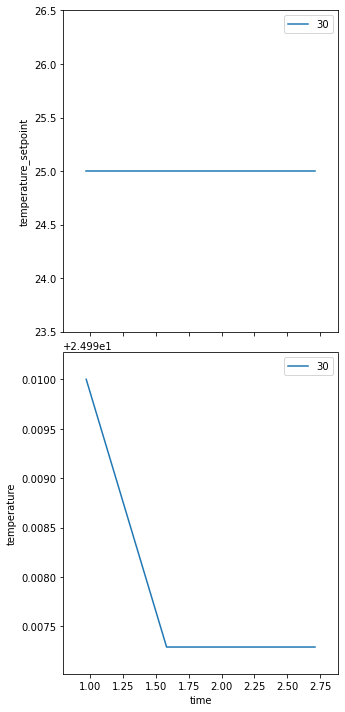

In [5]:
RE(bp.count([temperature], num=10))

Do all the readings look the same?  Perhaps there are only two different values (first one, then the other)?  That's because our measurements were only *reading* the temperature without waiting for it to update.  (If there are two different values, we caught the moment when EPICS updated the calculation.)  The table above showed `temperature_scanning_rate 5` which means EPICS is only updating every 2 seconds.

In [6]:
temperature.scanning_rate.get(as_string=True)

'2 second'

## Adjust the measurement interval
We need to slow down the measurement to this interval by adding the `delay=2` kwarg, sampling every 2 seconds.



Transient Scan ID: 31     Time: 2021-04-11 10:38:43
Persistent Unique Scan ID: 'd6f96dd6-c986-431b-9776-e57b1dffb259'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+-------------+
|   seq_num |       time | temperature_setpoint | temperature |
+-----------+------------+----------------------+-------------+
|         1 | 10:38:44.4 |             25.00000 |    25.16232 |
|         2 | 10:38:45.8 |             25.00000 |    24.67832 |
|         3 | 10:38:47.8 |             25.00000 |    25.43265 |
|         4 | 10:38:49.8 |             25.00000 |    25.18135 |
|         5 | 10:38:51.8 |             25.00000 |    24.81240 |
|         6 | 10:38:53.8 |             25.00000 |    24.86381 |
|         7 | 10:38:55.8 |             25.00000 |    24.55162 |
|         8 | 10:38:57.8 |             25.00000 |    24.74720 |
|         9 | 10:38:59.8 |             25.00000 |    24.59041 |
|        10 | 10:39:01.8 |             25.00000 |    25.46239 |
+--

('d6f96dd6-c986-431b-9776-e57b1dffb259',)

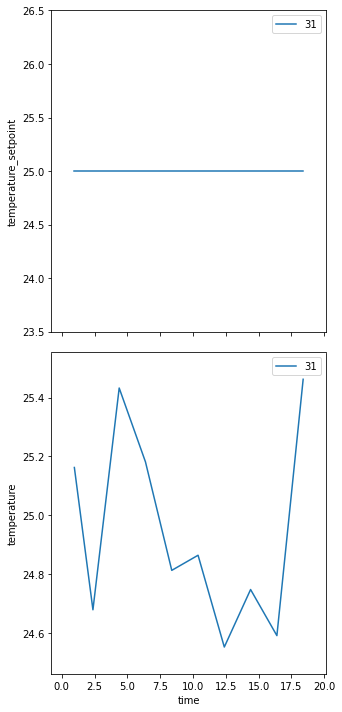

In [7]:
RE(bp.count([temperature], num=10, delay=2))

Let's reduce the update interval that EPICS uses, to the shortest interval EPICS provides, so our measurements do not take so long.

In [8]:
# print the list of possible values
print(temperature.scanning_rate.enum_strs)

# set the shortest interval, by name
temperature.scanning_rate.put(".1 second")
temperature.scanning_rate.get(as_string=True)

('Passive', 'Event', 'I/O Intr', '10 second', '5 second', '2 second', '1 second', '.5 second', '.2 second', '.1 second')


'.1 second'

## Collect our measurements
Repeat the measurement, this time with more observations.

Also, we'll add a metadata key:value pair so that later we can find this data more easily in the database.  Most plans take a `md={}` kwarg where the value is a Python dictionary with the key:value pair(s) to add to the run's metadata.



Transient Scan ID: 32     Time: 2021-04-11 10:39:04
Persistent Unique Scan ID: '52db2465-afcd-4f40-9ed5-ec171718459e'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+-------------+
|   seq_num |       time | temperature_setpoint | temperature |
+-----------+------------+----------------------+-------------+
|         1 | 10:39:04.6 |             25.00000 |    24.69730 |
|         2 | 10:39:04.7 |             25.00000 |    25.13307 |
|         3 | 10:39:04.8 |             25.00000 |    25.16824 |
|         4 | 10:39:04.9 |             25.00000 |    25.08616 |
|         5 | 10:39:05.5 |             25.00000 |    24.73593 |
|         6 | 10:39:05.7 |             25.00000 |    25.37524 |
|         7 | 10:39:06.2 |             25.00000 |    24.92385 |
|         8 | 10:39:06.3 |             25.00000 |    25.44432 |
|         9 | 10:39:06.9 |             25.00000 |    24.58627 |
|        10 | 10:39:07.1 |             25.00000 |    24.94921 |
|  

('52db2465-afcd-4f40-9ed5-ec171718459e',)

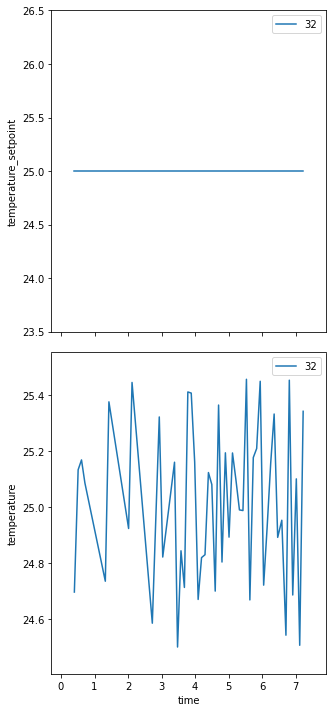

In [9]:
RE(bp.count([temperature], num=50, delay=0.1, md={"motive": "tscan"}))

## Get the data (from the database)
Let's get the measured data from the database now.  It's the most recent bluesky run, so an index of `-1` will identify it.

In [10]:
dataset = db.v2[-1].primary.read()

Let's get the values as a 1-D numpy array.

In [12]:
T = dataset["temperature"].values

## Compute the statistics
Use the methods of numpy arrays to compute maximum, mean, standard deviation, and minimum.  Looks nicer in a table.

In [13]:
table = pyRestTable.Table()
table.addLabel("measure")
table.addLabel("value")
table.addRow(("max", T.max()))
table.addRow(("mean", T.mean()))
table.addRow(("dev", T.std()))
table.addRow(("min", T.min()))
table.addRow(("#", len(T)))
print(table)

======= ===================
measure value              
======= ===================
max     25.455642023346304 
mean    25.01524284733349  
dev     0.27740414326271773
min     24.501403830014496 
#       50                 
======= ===================



Let's replot that data for comparison.

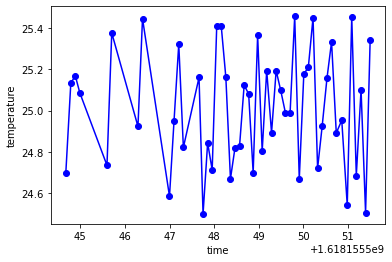

In [25]:
dataset["temperature"].plot(marker="o", color="blue")